<a href="https://colab.research.google.com/github/Kienknu/Kienknu/blob/main/Kien_SOA_mechanism_0310_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 19.5 MB/s eta 0:00:00


# 01. Try with one single rule

In [63]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

# Initial conditions
chemical_space_1 = {'Cc1ccccc1'}  # Toluene
reacting_species = {'[N+](=O)[O-]', 'O=N[O]', '[OH]'}
num_iterations = 3

# Reaction rule
reaction_rules = [AllChem.ReactionFromSmarts('[c:1]>>[c:1][OH]')]


# Reaction pathways
for _ in range(num_iterations):
    temp_new_products = set() # with OH attachment

    for reactant_smiles in chemical_space_1.copy():
        for rxn in reaction_rules:
            reactant_mol = Chem.MolFromSmiles(reactant_smiles)

            if reactant_mol:
                possible_products = rxn.RunReactants((reactant_mol,))
                for prod_set in possible_products:
                    for prod in prod_set:
                        prod_smiles = Chem.MolToSmiles(prod)
                        if prod_smiles not in chemical_space_1:
                            temp_new_products.add(prod_smiles)

    # Expand chemical space with new products
    chemical_space_1.update(temp_new_products)

# Display results
print("Generated Chemical Space:")
for chem in chemical_space_1:
    print(chem)

Generated Chemical Space:
Cc1ccc(O)cc1
Cc1(O)ccccc1O
Cc1(O)ccc(O)c(O)c1
Cc1cccc(O)c1(O)O
Cc1(O)ccc(O)cc1O
Cc1cc(O)cc(O)c1O
Cc1ccc(O)(O)cc1O
Cc1cc(O)(O)ccc1O
Cc1cc(O)c(O)c(O)c1
Cc1cccc(O)c1O
Cc1cccc(O)(O)c1
Cc1(O)cccc(O)c1
Cc1ccc(O)cc1(O)O
Cc1(O)cccc(O)c1O
Cc1(O)cc(O)cc(O)c1
Cc1(O)c(O)cccc1O
Cc1ccc(O)c(O)(O)c1
Cc1c(O)cc(O)cc1O
Cc1ccc(O)c(O)c1
Cc1c(O)cccc1O
Cc1cccc(O)c1
Cc1cc(O)cc(O)c1
Cc1ccc(O)(O)c(O)c1
Cc1ccc(O)c(O)c1O
Cc1(O)ccc(O)cc1
Cc1(O)ccccc1
Cc1c(O)ccc(O)c1O
Cc1cc(O)c(O)cc1O
Cc1cc(O)ccc1(O)O
Cc1c(O)cccc1(O)O
Cc1ccccc1(O)O
Cc1cccc(O)(O)c1O
Cc1ccccc1O
Cc1(O)cc(O)ccc1O
Cc1cc(O)cc(O)(O)c1
Cc1ccccc1
Cc1ccc(O)cc1O
Cc1ccc(O)(O)cc1
Cc1cc(O)ccc1O


[01:53:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:53:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:53:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8
[01:53:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:53:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:53:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:53:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:53:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8


[01:54:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 9
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 1 2 6 7 8
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 3 4 6 7 9
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 9
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 9
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8
[01:54:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:54:26] Can't kekuliz

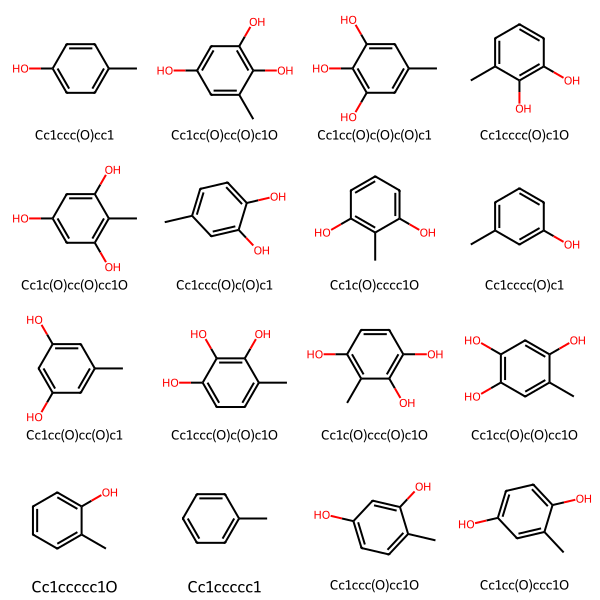

In [65]:
# Create Mol objects
smiles_list_1 = list(chemical_space_1)

mols = []

for smi in smiles_list_1:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

In [41]:
len(smiles_list_1)

39

#02. Try with multiple rules

In [42]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

# Initial conditions
chemical_space_2 = {'Cc1ccccc1'}  # Toluene
reacting_species = {'[N+](=O)[O-]', 'O=N[O]', '[OH]'}
num_iterations = 3

# Reaction rules
reaction_rules_1 = [AllChem.ReactionFromSmarts('[c:1]>>[c:1][OH]')]
reaction_rules_2 = [
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1]([N+](=O)[O-])[OH]'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1]([OH])[NO]')
    ]

# Reaction pathways
for _ in range(num_iterations):
    temp_new_products_1 = set()  # with OH attachment
    temp_new_products_2 = set()  # with NO/NO2 attachment

    # Apply OH attachment rule
    for reactant_smiles in chemical_space_2.copy():
        for rxn in reaction_rules_1:
            reactant_mol = Chem.MolFromSmiles(reactant_smiles)
            if reactant_mol:
                possible_products = rxn.RunReactants((reactant_mol,))
                for prod_set in possible_products:
                    for prod in prod_set:
                        prod_smiles = Chem.MolToSmiles(prod)
                        if prod_smiles not in chemical_space_2:
                            temp_new_products_1.add(prod_smiles)

    # Apply NO/NO2 attachment rules to products from previous step
    for reactant_smiles in temp_new_products_1:
        for rxn in reaction_rules_2:
            reactant_mol = Chem.MolFromSmiles(reactant_smiles)
            if reactant_mol:
                possible_products = rxn.RunReactants((reactant_mol,))
                for prod_set in possible_products:
                    for prod in prod_set:
                        prod_smiles = Chem.MolToSmiles(prod)
                        if prod_smiles not in chemical_space_2:
                            temp_new_products_2.add(prod_smiles)

    # Expand chemical space with new products
    chemical_space_2.update(temp_new_products_1)
    chemical_space_2.update(temp_new_products_2)

# Display results
print("Generated Chemical Space:")
for chem in chemical_space_2:
    print(chem)

Generated Chemical Space:
Cc1(O)ccccc1O
Cc1c(O)cc(O)([N+](=O)[O-])cc1O
Cc1cc(N)(O)ccc1O
Cc1cc(O)cc(N)(O)c1
Cc1cc(O)cc(O)([N+](=O)[O-])c1
Cc1ccc(O)([N+](=O)[O-])c(O)c1O
Cc1cc(O)ccc1(N)O
Cc1cccc(O)c1O
Cc1cc(O)c(N)(O)c(O)c1
Cc1cc(O)cc(O)c1(N)O
Cc1cc(O)c(O)([N+](=O)[O-])cc1O
Cc1(O)cccc(O)c1O
Cc1c(O)c(O)ccc1(O)[N+](=O)[O-]
Cc1(O)c(O)cccc1O
Cc1c(O)ccc(O)c1(N)O
Cc1cccc(O)c1(N)O
Cc1ccc(N)(O)cc1O
Cc1ccc(O)c(O)(O)c1
Cc1c(O)cc(O)cc1O
Cc1ccc(O)([N+](=O)[O-])cc1
Cc1c(O)cccc1(N)O
Cc1ccc(O)c(O)([N+](=O)[O-])c1
Cc1ccc(N)(O)cc1
Cc1ccc(O)(O)c(O)c1
Cc1ccc(O)c(O)c1(O)[N+](=O)[O-]
Cc1cccc(O)([N+](=O)[O-])c1
Cc1c(O)ccc(O)c1(O)[N+](=O)[O-]
Cc1ccc(O)c(O)([N+](=O)[O-])c1O
Cc1cccc(O)c1(O)[N+](=O)[O-]
Cc1(O)ccccc1
Cc1c(O)ccc(O)c1O
Cc1cc(O)c(O)cc1O
Cc1c(O)cc(O)cc1(O)[N+](=O)[O-]
Cc1ccc(O)([N+](=O)[O-])c(O)c1
Cc1cc(O)ccc1(O)O
Cc1c(O)cccc1(O)O
Cc1cc(O)cc(N)(O)c1O
Cc1cc(O)c(O)cc1(O)[N+](=O)[O-]
Cc1cc(N)(O)cc(O)c1O
Cc1ccccc1O
Cc1ccc(O)cc1(N)O
Cc1(O)cc(O)ccc1O
Cc1ccc(N)(O)c(O)c1
Cc1cc(O)cc(O)(O)c1
Cc1cc(O)cc(O)([N+](=

[01:27:31] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 10
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 9 10
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:27:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:27:31] Can't kekul

[01:56:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 4 10 11
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 6 7 8
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 9
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 11
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 9 11
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 8 10
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 10 11
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 4 6 7
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:56:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[01:56:39] Can't 

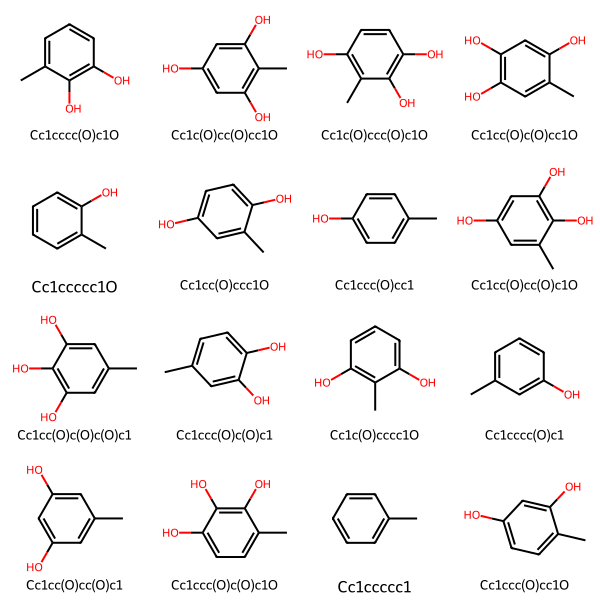

In [66]:
# Create Mol objects
smiles_list_2 = list(chemical_space_2)

mols = []


for smi in smiles_list_2:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])

In [67]:
len(smiles_list_2)

97

# Another try using: 'try...except'

In [68]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

# Initial conditions
chemical_space_3 = {'Cc1ccccc1'}  # Toluene
reacting_species = {'[N+](=O)[O-]', 'O=N[O]', '[OH]'}
num_iterations = 3

# Reaction rules
reaction_rules_1 = [AllChem.ReactionFromSmarts('[c:1]>>[c:1][OH]')]
reaction_rules_2 = [
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1]([N+](=O)[O-])[OH]'),
    AllChem.ReactionFromSmarts('[c:1][OH]>>[c:1]([OH])[NO]')
    ]

# Reaction pathways
for _ in range(num_iterations):
    temp_new_products_1 = set()  # with OH attachment
    temp_new_products_2 = set()  # with NO/NO2 attachment

    # Apply OH attachment rule
    for reactant_smiles in chemical_space_3.copy():
        for rxn in reaction_rules_1:
            reactant_mol = Chem.MolFromSmiles(reactant_smiles)
            if reactant_mol:
                possible_products = rxn.RunReactants((reactant_mol,))
                for prod_set in possible_products:
                    for prod in prod_set:
                        prod_smiles = Chem.MolToSmiles(prod)
                        if prod_smiles not in chemical_space_3:
                            temp_new_products_1.add(prod_smiles)

    # Apply NO/NO2 attachment rules to products from previous step
    for reactant_smiles in temp_new_products_1:
        for rxn in reaction_rules_2:
            reactant_mol = Chem.MolFromSmiles(reactant_smiles)
            if reactant_mol:
                possible_products = rxn.RunReactants((reactant_mol,))
                for prod_set in possible_products:
                    for prod in prod_set:
                        prod_smiles = Chem.MolToSmiles(prod)
                        if prod_smiles not in chemical_space_3:
                            temp_new_products_2.add(prod_smiles)

                # Validate the product
                try:
                    Chem.SanitizeMol(prod)
                    # Print SMILES before Kekulization
                    print("Before Kekulization:", Chem.MolToSmiles(prod))

                    prod.GetAtomWithIdx(0).SetIsAromatic(True)

                    Chem.Kekulize(prod)

                    is_valid = True
                    for atom in prod.GetAtoms():
                        if atom.GetSymbol() == 'C' and atom.GetExplicitValence() > 4:
                            is_valid = False
                            break

                    if is_valid:

                        chemical_space_3.add(Chem.MolToSmiles(prod))
                except:
                    pass

    # Expand chemical space with new products
    chemical_space_3.update(temp_new_products_1)
    chemical_space_3.update(temp_new_products_2)

# Display results
print("Generated Chemical Space:")
for chem in chemical_space_3:
    print(chem)


Generated Chemical Space:
Cc1(O)ccccc1O
Cc1c(O)cc(O)([N+](=O)[O-])cc1O
Cc1cc(N)(O)ccc1O
Cc1cc(O)cc(N)(O)c1
Cc1cc(O)cc(O)([N+](=O)[O-])c1
Cc1ccc(O)([N+](=O)[O-])c(O)c1O
Cc1cc(O)ccc1(N)O
Cc1cccc(O)c1O
Cc1cc(O)c(N)(O)c(O)c1
Cc1cc(O)cc(O)c1(N)O
Cc1cc(O)c(O)([N+](=O)[O-])cc1O
Cc1(O)cccc(O)c1O
Cc1c(O)c(O)ccc1(O)[N+](=O)[O-]
Cc1(O)c(O)cccc1O
Cc1c(O)ccc(O)c1(N)O
Cc1cccc(O)c1(N)O
Cc1ccc(N)(O)cc1O
Cc1ccc(O)c(O)(O)c1
Cc1c(O)cc(O)cc1O
Cc1ccc(O)([N+](=O)[O-])cc1
Cc1c(O)cccc1(N)O
Cc1ccc(O)c(O)([N+](=O)[O-])c1
Cc1ccc(N)(O)cc1
Cc1ccc(O)(O)c(O)c1
Cc1ccc(O)c(O)c1(O)[N+](=O)[O-]
Cc1cccc(O)([N+](=O)[O-])c1
Cc1c(O)ccc(O)c1(O)[N+](=O)[O-]
Cc1ccc(O)c(O)([N+](=O)[O-])c1O
Cc1cccc(O)c1(O)[N+](=O)[O-]
Cc1(O)ccccc1
Cc1c(O)ccc(O)c1O
Cc1cc(O)c(O)cc1O
Cc1c(O)cc(O)cc1(O)[N+](=O)[O-]
Cc1ccc(O)([N+](=O)[O-])c(O)c1
Cc1cc(O)ccc1(O)O
Cc1c(O)cccc1(O)O
Cc1cc(O)cc(N)(O)c1O
Cc1cc(O)c(O)cc1(O)[N+](=O)[O-]
Cc1cc(N)(O)cc(O)c1O
Cc1ccccc1O
Cc1ccc(O)cc1(N)O
Cc1(O)cc(O)ccc1O
Cc1ccc(N)(O)c(O)c1
Cc1cc(O)cc(O)(O)c1
Cc1cc(O)cc(O)([N+](=

[01:59:17] Can't kekulize mol.  Unkekulized atoms: 5 6 7 9 10
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 10
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 9 10
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:59:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 8
[01:59:17] Can't keku

[01:59:45] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 4 10 11
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 6 7 8
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 9
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 11
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 9 11
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 8 10
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 10 11
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 4 6 7
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[01:59:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[01:59:45] Can't 

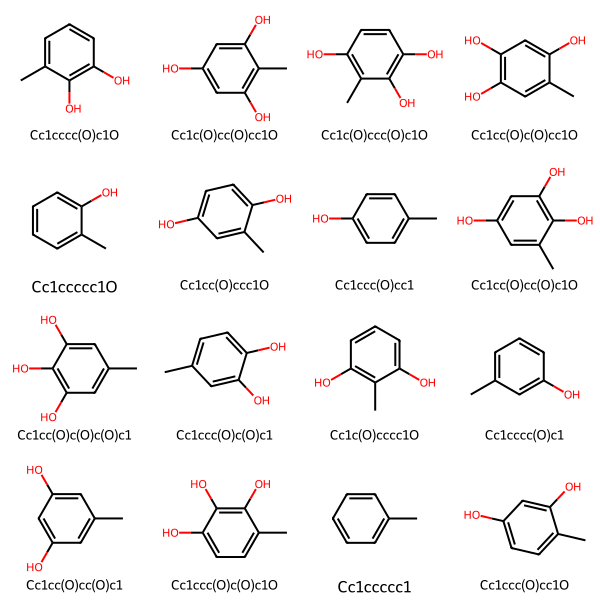

In [70]:
# Create Mol objects
smiles_list_3 = list(chemical_space_3)

mols = []


for smi in smiles_list_3:
    mol = Chem.MolFromSmiles(smi)

    if mol:
        mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150), legends=[Chem.MolToSmiles(mol) for mol in mols])


In [71]:
len(smiles_list_3)

97